# Методы на основе деревьев



## Этот проверочный проект можно выполнять тремя разными способами - мы обсуждаем это в видео-лекции с обзором проверочных заданий!

----

**Проверочный проект можно выполнять одним из трёх способов:**
   1. Открыть новый блокнот Jupyter Notebook, загрузить данные из файла - и далее самостоятельно выполнить анализ и визуализацию данных, а также создать предиктивную модель.
   2. Использовать блокнот с заданиями как общее руководство к действию, выполняя задания, написанные жирным шрифтом.
   3. Сразу перейти к блокноту с решениями и видео-лекциям с решениями, и параллельно с просмотром лекций выполнять эти задания в своём блокноте.

------
------

## ЦЕЛЬ: Создать модель предсказания того, уйдёт ли абонент в отток (churn).

----
----


## Выполните задания ниже, обозначенные жирным шрифтом!

## Часть 0: Импортируем библиотеки и загружаем данные



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('..\\DATA\\Telco-Customer-Churn.csv')

In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Часть 1: Общие характеристики данных

**С помощью метода .info() проверим типы данных для колонок, а также есть ли отсутствующие значения в датафрейме.**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Выведите статистические метрики для числовых колонок с помощью .describe(). Увидим, что большинство колонок являются категориальными, поэтому позднее нужно будет создать для них дамми-переменные.**

In [48]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Часть 2:  Исследование данных (Exploratory Data Analysis)

## Исследование признаков

**Проверим, что в этих данных нет отсутствующих значений - для этого выведем количество значений NaN отдельно для каждой колонки.**

In [49]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Построим график CountPlot для проверки сбалансированности значений колонки с классами (Churn).**

<AxesSubplot:xlabel='Churn', ylabel='count'>

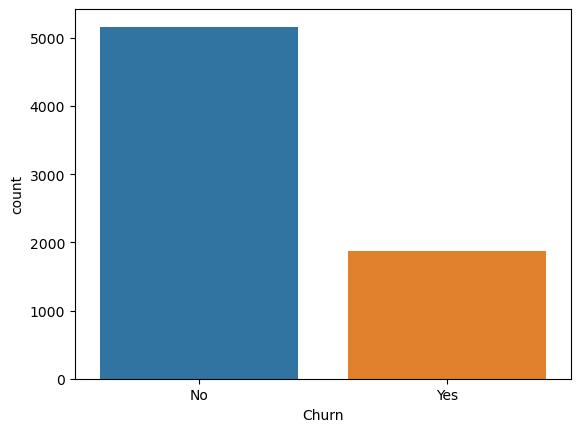

In [50]:
sns.countplot(data=df, x='Churn')

**Исследуем распределение колонки TotalCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

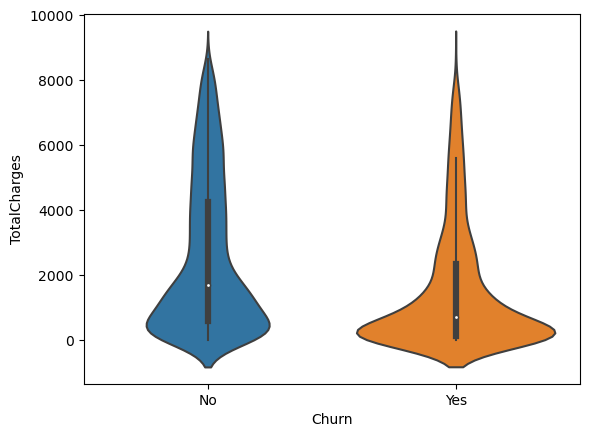

In [51]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

**Построим график boxplot с распределением колонки TotalCharges для различных типов контрактов, а также добавим раскраску цветами по колонке Churn.**

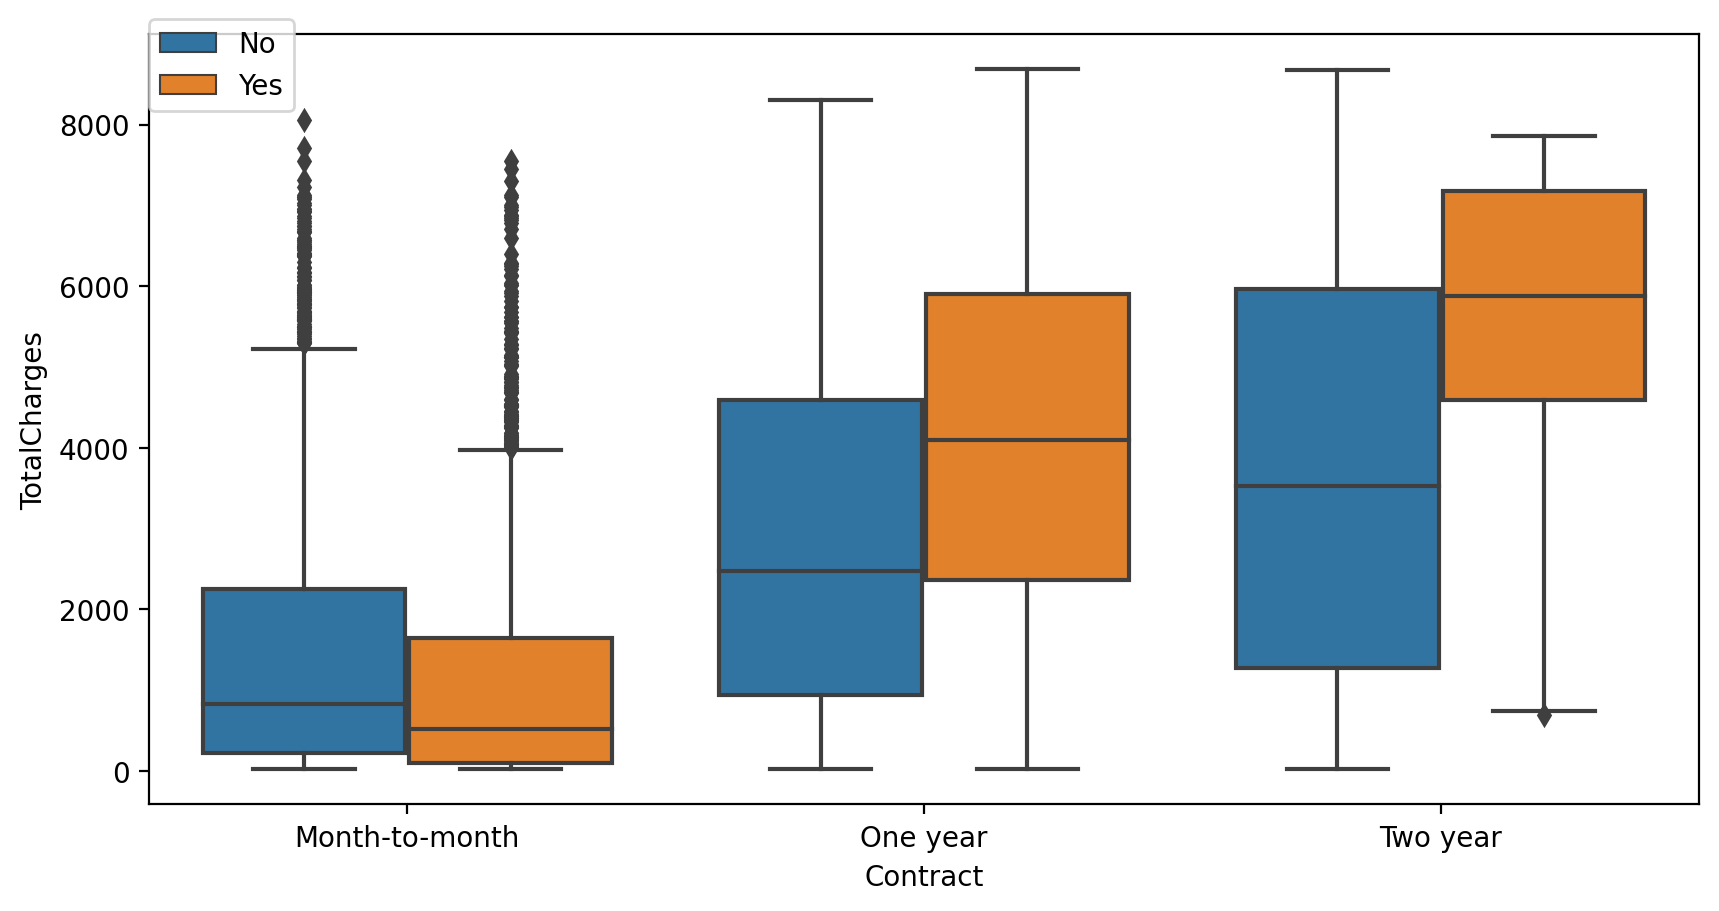

In [53]:
plt.figure(figsize=(10,5), dpi=200)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(loc=(0,0.9))

**Построим график barplot с корреляции указанных ниже признаков с целевой переменной. Обратим внимание, что для категориальных признаков сначала нужно сконвертировать их в дамми-переменные, потому что корреляция вычисляется только для числовых колонок.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [54]:
dummies = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [55]:
corr_df = df.copy()
corr_df = pd.get_dummies(corr_df, columns=dummies)

In [56]:
corr_yes_churn = corr_df.corr()['Churn_Yes'].sort_values()[1:-1]

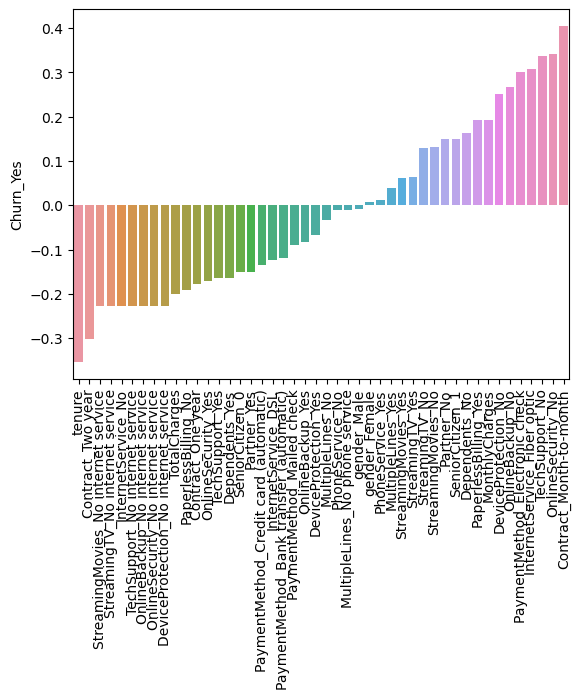

In [57]:
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn)
plt.xticks(rotation=90);

---
---

# Часть 3: Анализ оттока

**В этих заданиях мы выполним сегментацию абонентов на основе колонки tenure, создавая "когорты" и выполняя сравнение данных между различными когортами.**

**Перечислим 3 типа контракта (колонка Contract).**

In [5]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Создадим гистограмму с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании.**

In [59]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

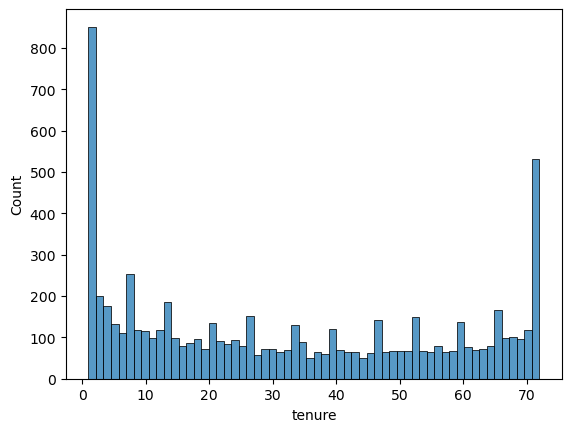

In [60]:
sns.histplot(data=df,x='tenure', bins=60)

**Построим гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract.**

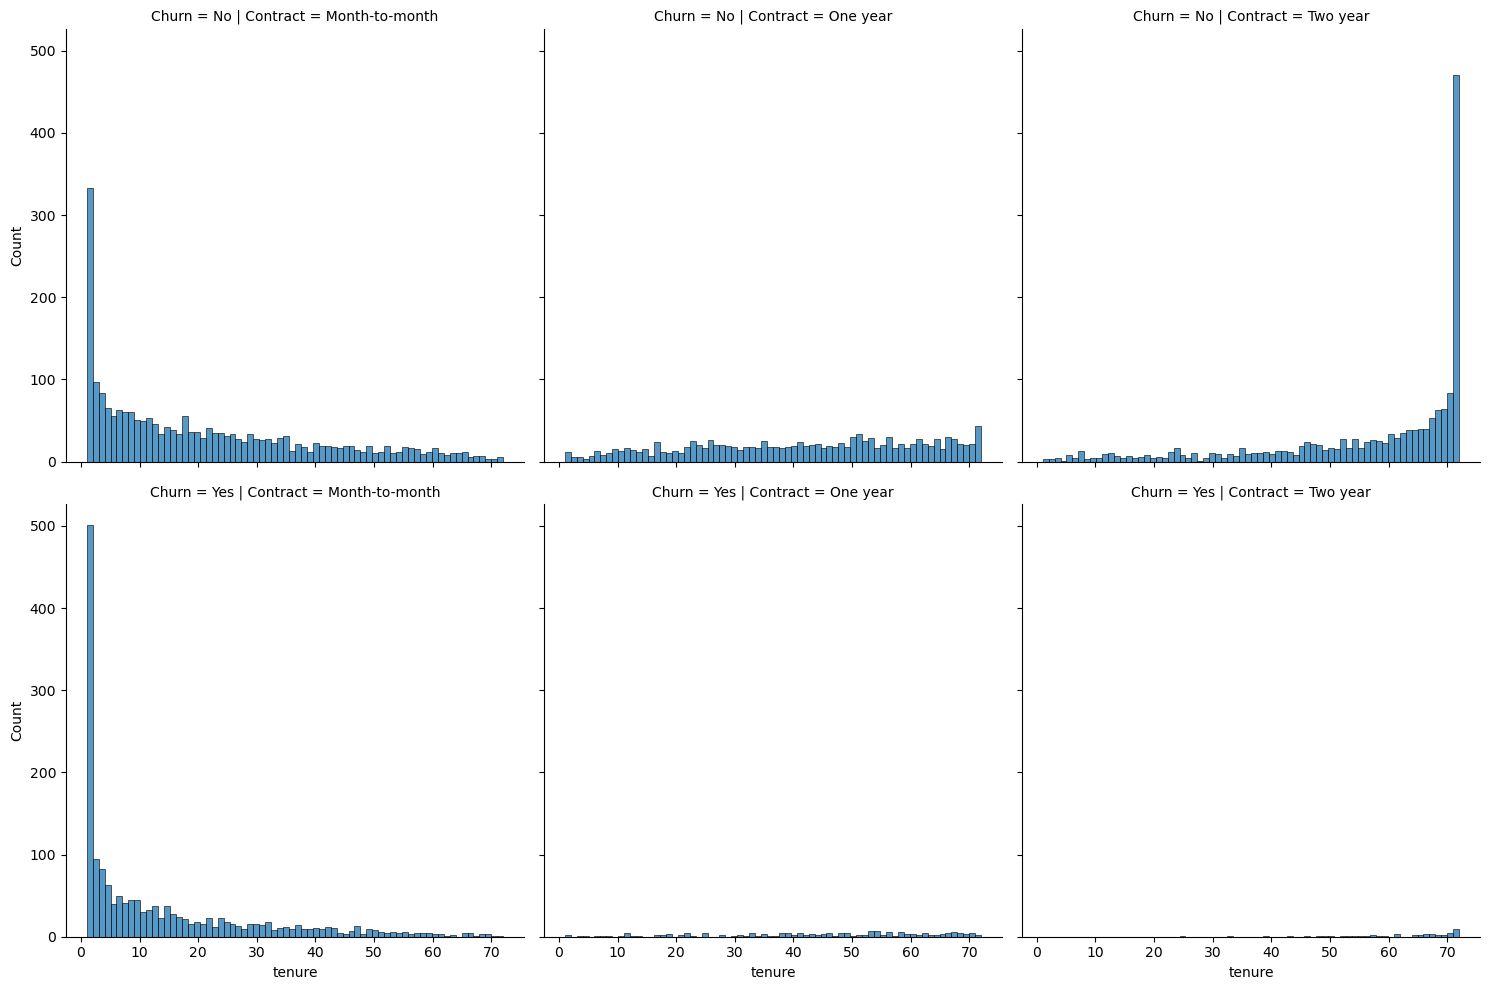

In [61]:
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')

**Построми график scatterplot для колонок Total Charges и Monthly Charges, раскрашивая график цветами по колонке Churn.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

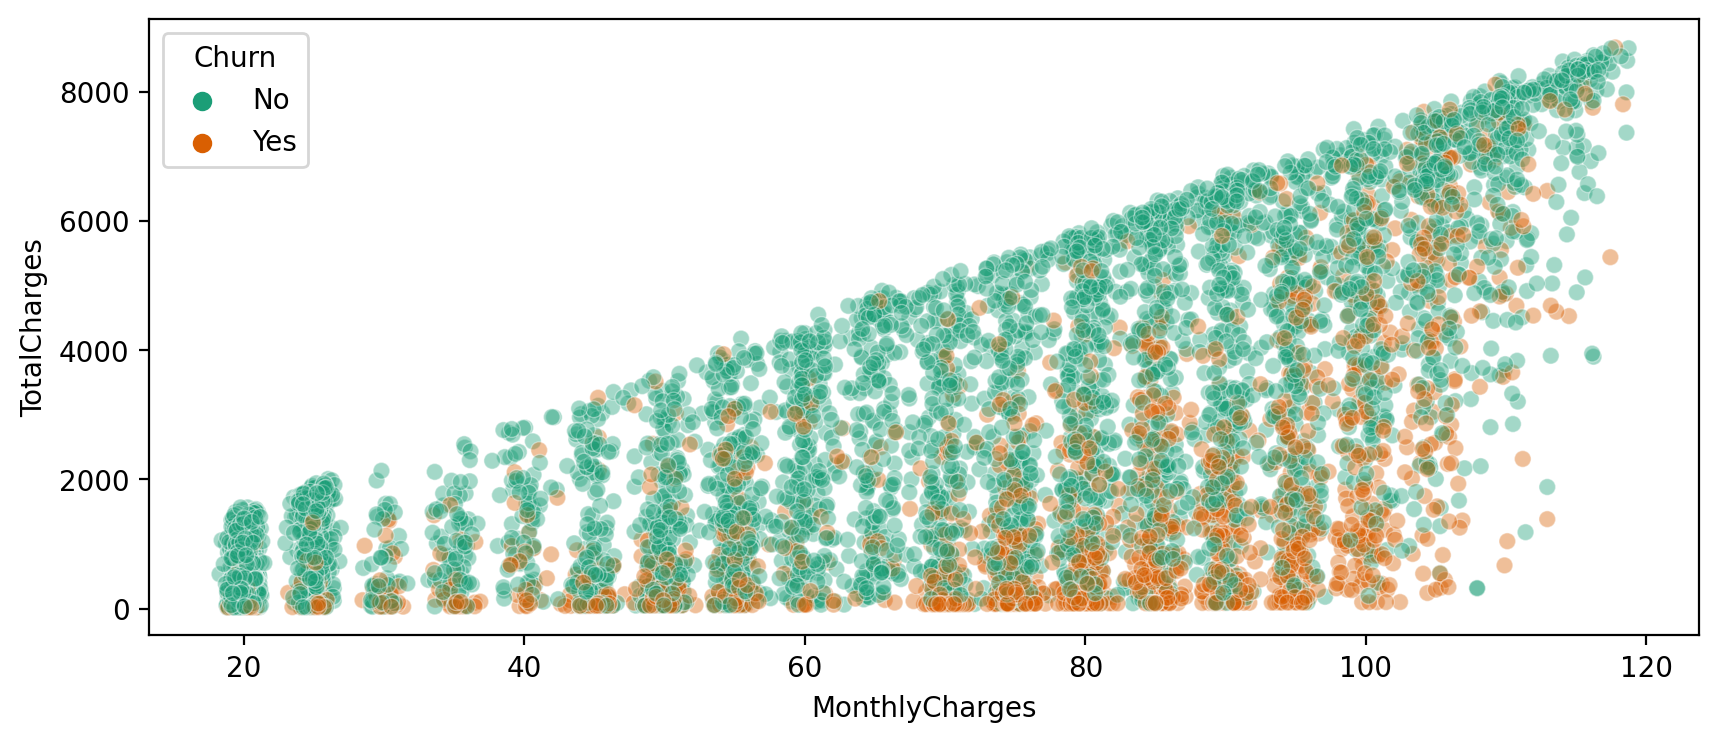

In [62]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.4, lw=0.3, 
                palette='Dark2')

### Создание когорт (сегментов) по колонке Tenure

**Для начала поместим различные значения tenure (1 месяц, 2 месяца, 3 месяца и так далее) в отдельные когорты (сегменты).**

**Для каждого уникального значения колонки tenure в качестве когорты, вычислим процент оттока (churn rate) - это количество тех людей, кто ушёл в отток в когорте, как процент от общего количества людей в данной когорте. Вычислим такой процент отдельно для каждой когорты.**

In [63]:
count_of_months = np.arange(1,73)
churn_percentage = []
for i in count_of_months:
    percent = round((len(df[df['tenure'] == i].loc[df['Churn'] == 'Yes','Churn'])*100/
                     len(df[df['tenure'] == i]['Churn'])),6)
    churn_percentage.append(percent)
    
churn_data = pd.Series(index=count_of_months, data=churn_percentage)
    
    

In [64]:
churn_data 

1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Length: 72, dtype: float64

In [65]:
df.groupby(['Churn','tenure']).count().T['Yes']

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [66]:
#round((len(df[df['tenure'] == 1].loc[df['Churn'] == 'Yes','Churn'])*100/
#       len(df[df['tenure'] == 1]['Churn'])),6)

**Используя результаты предыдущего задания, построим график процента оттока для различных значений tenure.**

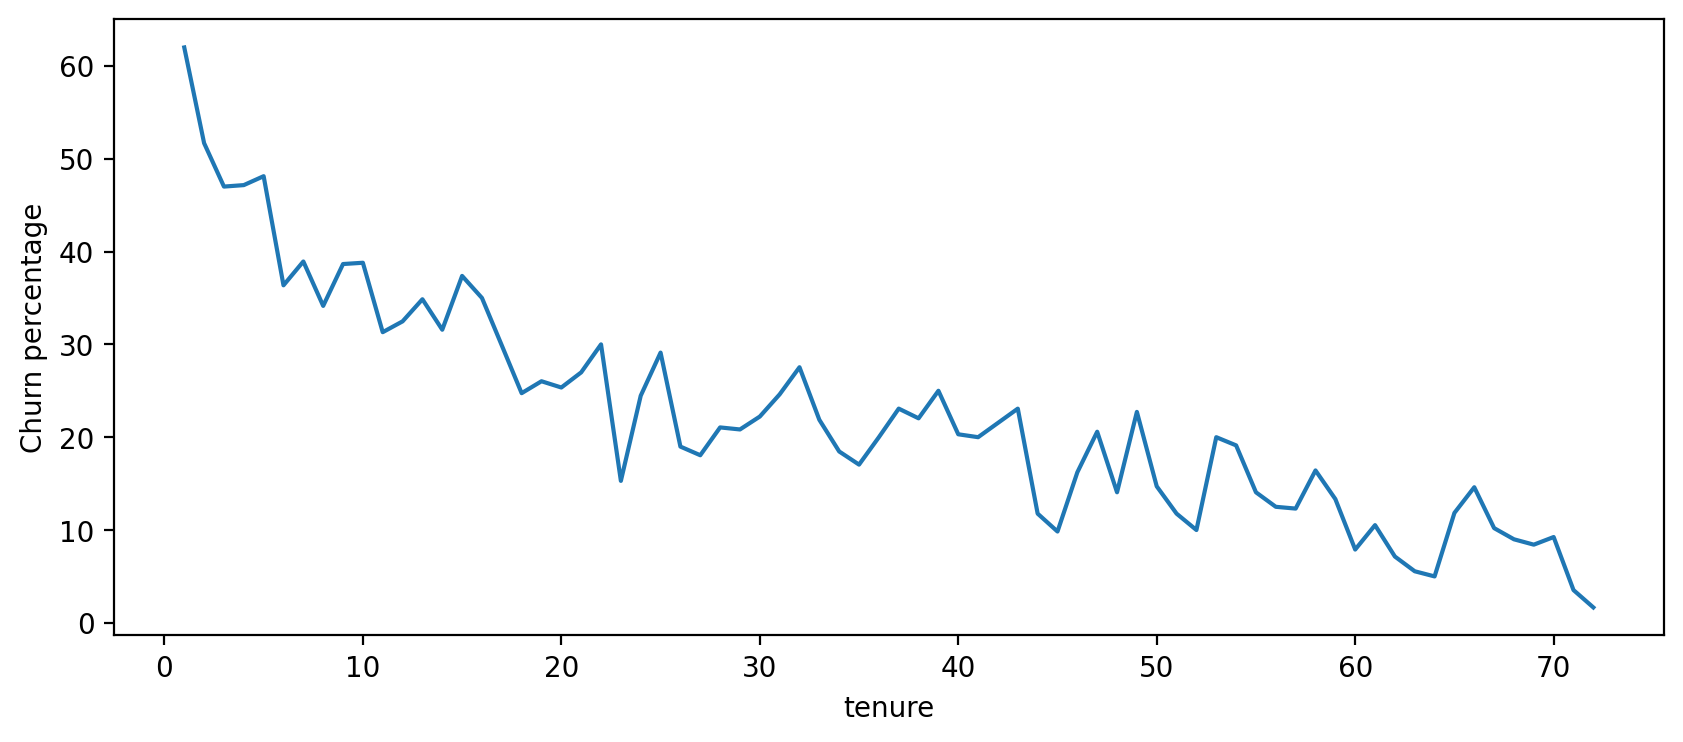

In [68]:
plt.figure(figsize=(10,4), dpi=200)
plt.plot(churn_data.index,churn_data.values);
plt.ylabel('Churn percentage')
plt.xlabel('tenure');

### Более крупные когорты (сегменты)
**На основе колонки tenure создадим новую колонку с названием "Tenure Cohort", в которой будут следующие 4 категории:**
   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'    

In [69]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 месяцев'
    elif tenure < 25:
        return '12-24 месяцев'
    elif tenure < 49:
        return '24-48 месяцев'
    else:
        return 'Более 48 месяцев'
    

In [70]:
df['Tenure Cohort'] = df['tenure'].apply(cohort) # Получаем конвертацию значений в более крупные сегменты

In [71]:
df[['Tenure Cohort', 'tenure']]

,Tenure Cohort,tenure
0,0-12 месяцев,1
1,24-48 месяцев,34
2,0-12 месяцев,2
3,24-48 месяцев,45
4,0-12 месяцев,2
...,...,...
7027,12-24 месяцев,24
7028,Более 48 месяцев,72
7029,0-12 месяцев,11
7030,0-12 месяцев,4


**Построми график scatterplot для Total Charges и Monthly Charts, раскрашивая график разными цветами по колонке "Tenure Cohort", которую мы создали в предыдущем задании.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

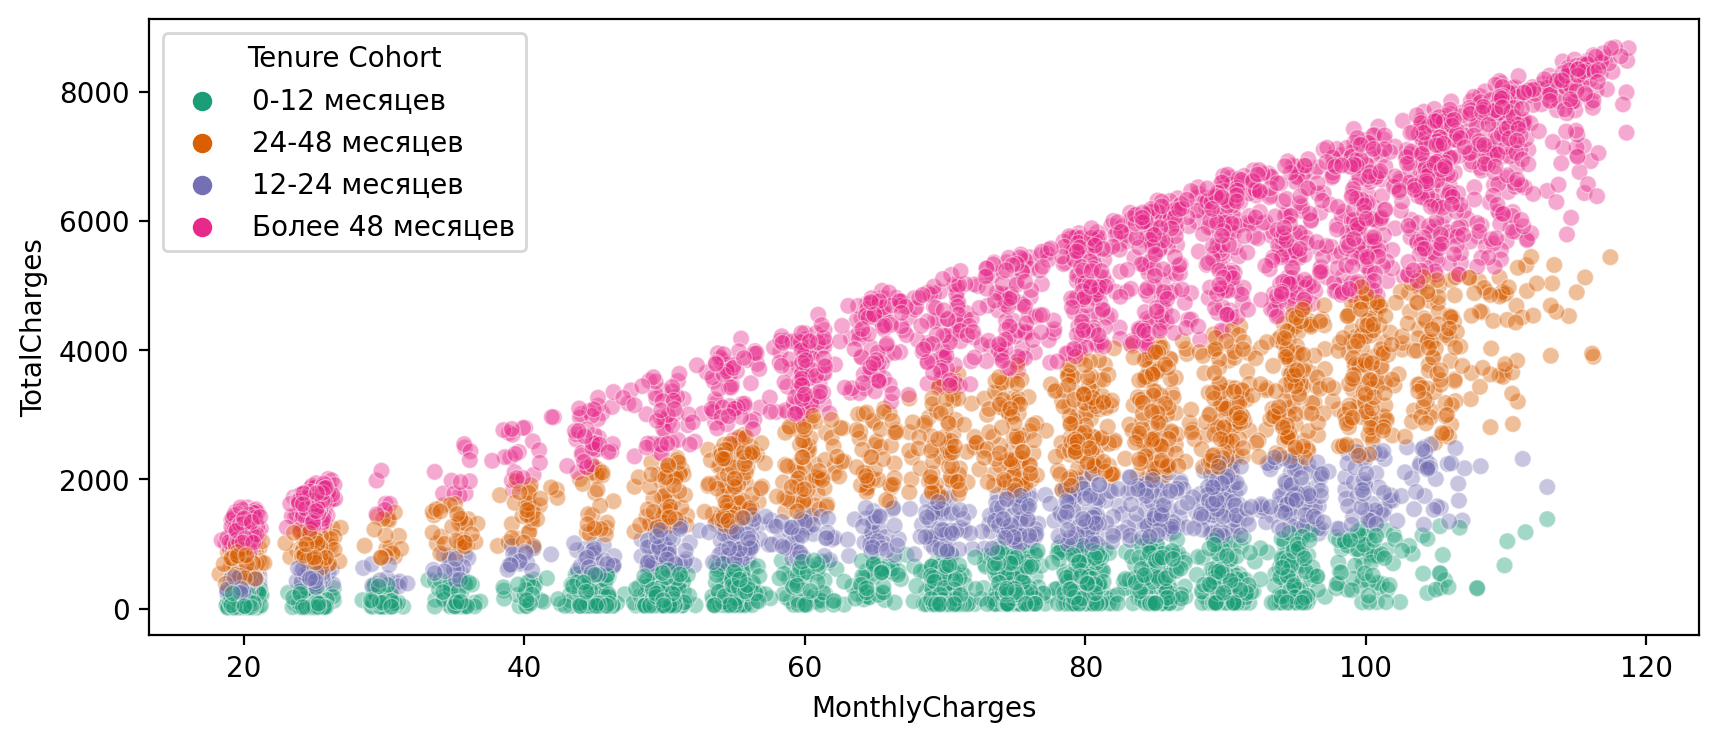

In [72]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.4, lw=0.3, 
                palette='Dark2')

**Построим график countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

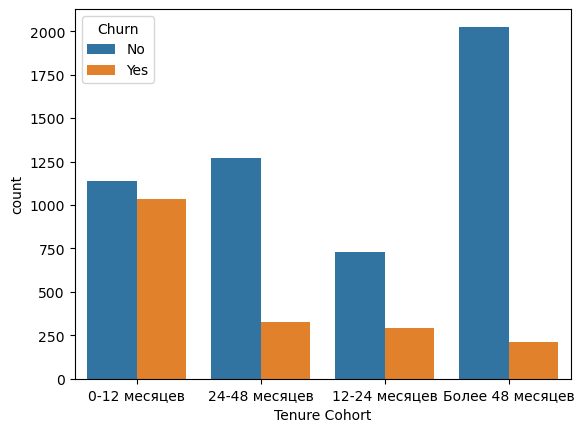

In [73]:
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

**Создадим набор графиков CountPlot с количеством людей по различным когортам Tenure Cohort. Для каждого типа контракта создадим отдельный график, и раскрасим эти графики разными цветами по колонке Churn.**

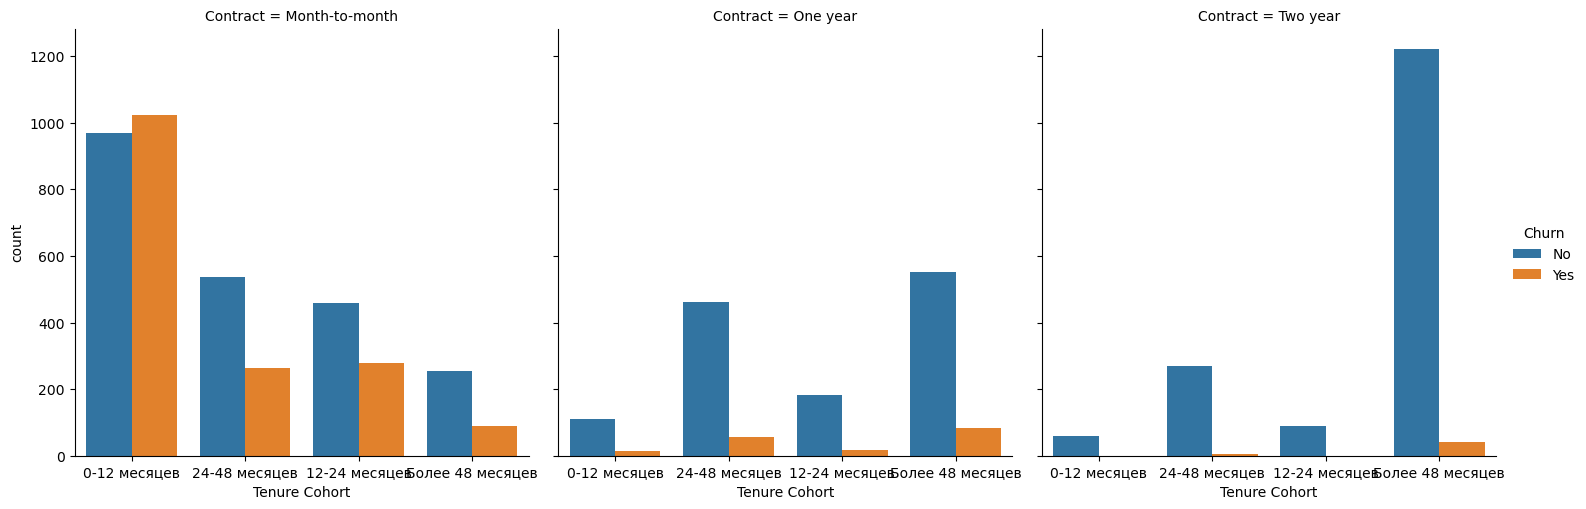

In [74]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count', col='Contract')

-----

# Часть 4: Предиктивная модель

**Давайте исследуем 4 модели на основе деревьев: одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг.**


## Одно дерево решений (Decision Tree)

**Разделим все данные на признаки X и целевую переменную Y. Создайте дамми-переменные, где это необходимо, а также посмотрим, есть ли какие-то признаки, которые можно было бы удалить.**

In [75]:
X = df.drop(['Churn', 'customerID'], axis=1)

In [76]:
X = pd.get_dummies(X, drop_first=True)

In [77]:
y = df.Churn

**Выполним разбиение данных на обучающий и тестовый наборы (train test split), откладывая в сторону 10% данных для тестирования. В решениях мы используем random_state=101.**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**Построим модель Decision Tree и оцените её работу. Для этого выполним следующие шаги:**
   1. Обучим модель дерева решений.
   2. Оценим метрики работы модели дерева решений - для этого выведем отчёт "classification report" и нарисуем график с матрицей ошибок (confusion matrix).
   2. Посмотрим на важности признаков для получившегося дерева решений.
   4. Опционально: Нарисуем график получившегося дерева. Обратим внимание, что если дерево получилось очень большим и мы не выполняли усечение дерева с помощью параметров, то вызов метода plot_tree может привести к ошибке.

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier(max_depth=6)

In [44]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [78]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [79]:
preds = dt.predict(X_test)

In [81]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



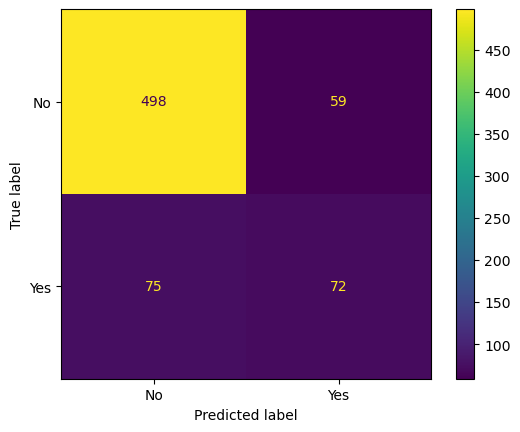

In [82]:
plot_confusion_matrix(dt,X_test, y_test)

In [89]:
imp_feats = pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['Важность'])
imp_feats = imp_feats.sort_values('Важность')

In [91]:
imp_feats = imp_feats[imp_feats['Важность'] > 0]

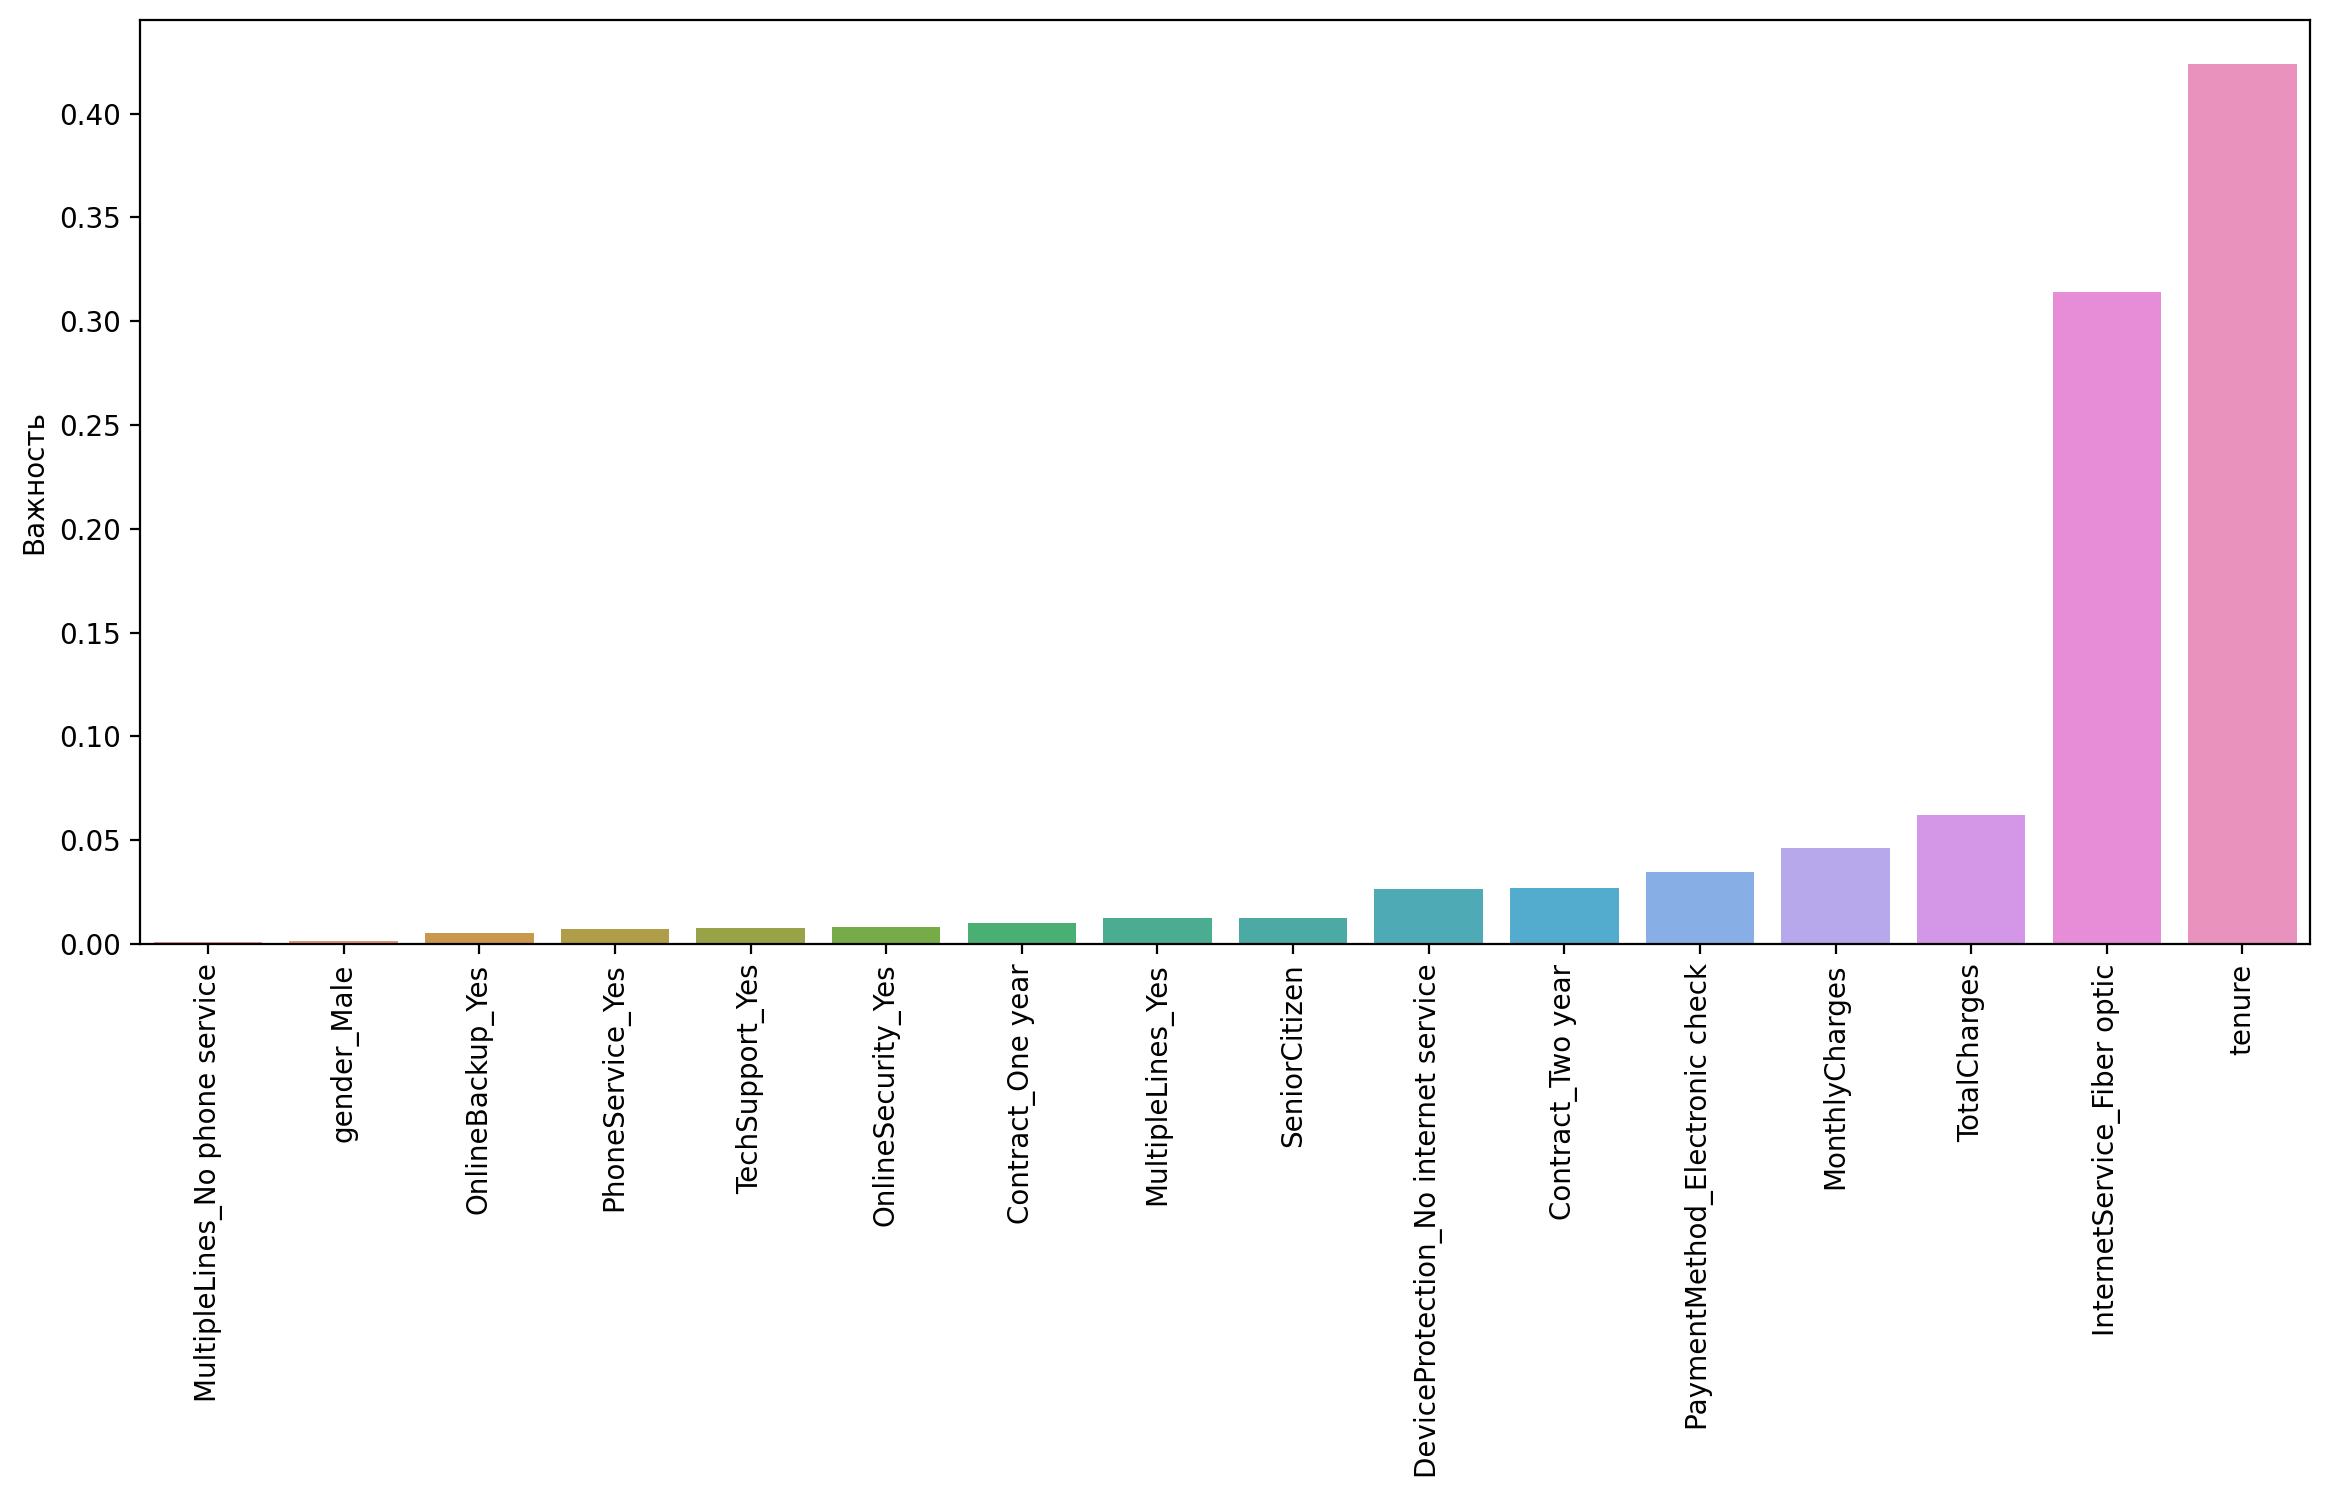

In [95]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_feats, x=imp_feats.index,y='Важность')
plt.xticks(rotation=90);

In [96]:
from sklearn.tree import plot_tree

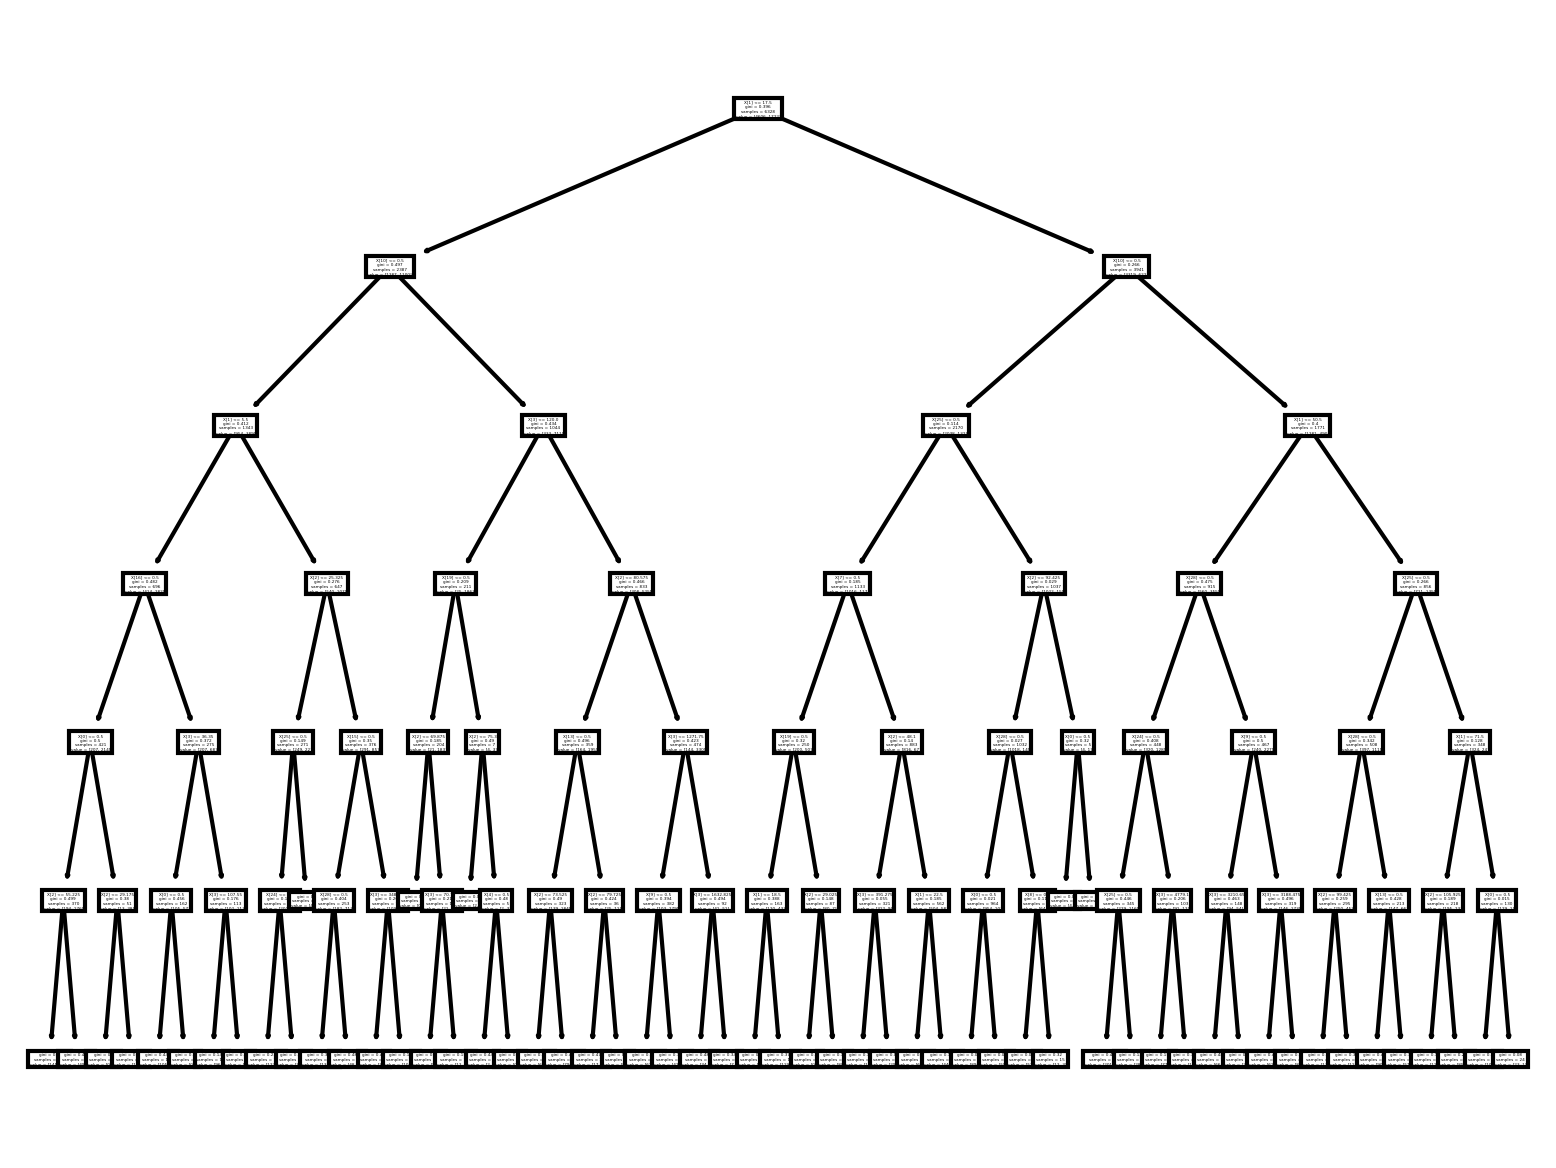

In [100]:
plt.figure(dpi=300)
plot_tree(dt);

## Случайный лес (Random Forest)

**Создадим модель случайного леса, затем выведем отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier()

In [109]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [110]:
preds = rf.predict(X_test)

In [111]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.61      0.44      0.51       147

    accuracy                           0.82       704
   macro avg       0.74      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



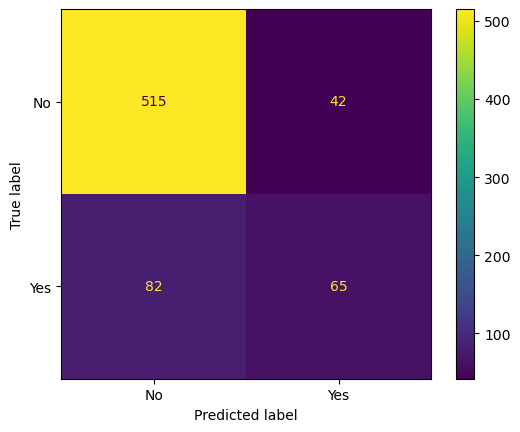

In [112]:
plot_confusion_matrix(rf, X_test, y_test)

## Расширяемые деревья (Boosted Trees)

**Создадим модель AdaBoost или Gradient Boosting, затем выведем отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [115]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [116]:
ada_model = AdaBoostClassifier()

In [117]:
gb_model = GradientBoostingClassifier()

In [118]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [119]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [125]:
ada_preds = ada_model.predict(X_test)

In [126]:
gb_preds = gb_model.predict(X_test)

In [127]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [128]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [294]:
# У нас получились наилучшие результаты в модели AdaBoostClassifier, 
# однако надо сказать, что мы не выполняли поиск по сетке grid search,
# и целом модели показывали очень похожие результаты на этих данных.